# NEISS, Part 2 (this class)

* **Dataset:** `neiss2017.tsv` (kind of) - NEISS, again! But an old one, because the newer one is too nice.
* **Source:** https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data
* **Topics:**
    - filtering with `.str.contains` and simple anchored regular expressions
    - pulling out text with `.str.extract`
    - pandas display options
    - joining/merging tables
    - datetime parsing and manipulation

In [16]:
import pandas as pd
import numpy as np

# Cut off text columns after 200 characters
pd.set_option("display.max_colwidth", 200)

%matplotlib inline

# 0) Read in our data

In [17]:
df = pd.read_csv("cleaned.csv")
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,White,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,Male,White,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE,"DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM",S,46.0,77.6641
3,170100737,01/01/2017,55.0,Female,White,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86.0,Female,White,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


## 1) Let's only take out punchers

* After we learn this, what else can we do?

In [7]:
punches = df[df.Narrative_1.str.contains("PUNCH")]
punches.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
32,170102931,01/01/2017,26.0,Male,NaN,NaN,82.0,59.0,NaN,1.0,1.0,NaN,1892.0,NaN,26YOM LAC HAND- PUNCHED GLASS DOOR,NaN,M,14.0,87.0904


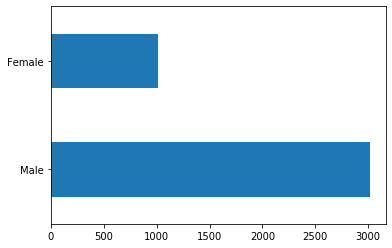

In [18]:
punches.Sex.value_counts().plot(kind='barh')

In [20]:
punches.Narrative_1.head(10)

0      21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE
32                                          26YOM LAC HAND- PUNCHED GLASS DOOR
93                         26 YR OLD MALE PUNCHED GLASS WINDOW AND LAC FOREARM
129                            25YOM PUNCHED A GLASS DOOR AND CUT HIS FOREARM.
163                                 26YOF WITH FRACTURED WRIST, PUNCHED A WALL
199         12 YOM INJURED HAND,WRIST,PUNCHING BOXING BAG. DX- CONTUSION RIGHT
420    PT HAS RIGHT HAND PAIN AFTER PUNCHING A DOOR   METACARPAL FRACTURE   23
634                 LT HAND LAC.  18YOM PUNCHED GLASS WINDOW WITH HAND.  ETOH.
635               HAND LAC.  25YOM PUNCHED GLASS DOOR WITH HAND.  ETOH.  LWOT.
647                      LT HAND PAIN.  26YOM PAIN IN HAND FROM PUNCHING WALL.
Name: Narrative_1, dtype: object

In [24]:
punches.Narrative_1.str.extract("PUNCHED A (.*)").dropna()

,0
129,GLASS DOOR AND CUT HIS FOREARM.
163,WALL
863,MIRROR: D
993,WALL W/ RIGHT HAND DX: OPEN WOUND OF HAND
1073,WOODEN TABLE SUSTAINED A HAND FX
1235,FISH TANK WALKED OUT
1273,MIRROR. DX HAND FX
1828,GLASS WINDOW DX: OPEN WOUND OF HAND
1857,WINDOW AND CUT UPPER ARM
2176,WALL CONTUSION RIGHT HAND


In [40]:
codes = pd.read_csv("neiss_fmt.txt", sep='\t')
codes = codes[codes['Format name'] == 'PROD']
#codes['Starting value for format'] = codes['Starting value for format'].astype(str).str.zfill(4)
codes.head()

,Format name,Starting value for format,Ending value for format,Format value label
112,PROD,101,101,101 - WASHING MACHINES WITHOUT WRINGERS OR OTHER DRYERS
113,PROD,102,102,102 - WRINGER WASHING MACHINES
114,PROD,103,103,103 - WASHING MACHINES WITH UNHEATED SPIN DRYERS
115,PROD,106,106,106 - ELECTRIC CLOTHES DRYERS WITHOUT WASHERS
116,PROD,107,107,107 - GAS CLOTHES DRYERS WITHOUT WASHERS


In [42]:
merged = punches.merge(codes, left_on='Product_1', right_on='Starting value for format')
merged.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,...,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,Format name,Starting value for format,Ending value for format,Format value label
0,170100733,01/01/2017,21.0,Male,White,NaN,75.0,62.0,NaN,1.0,...,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641,PROD,1207,1207,"1207 - BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
1,170106918,01/01/2017,12.0,Male,Black,NaN,82.0,53.0,NaN,1.0,...,NaN,"12 YOM INJURED HAND,WRIST,PUNCHING BOXING BAG. DX- CONTUSION RIGHT","HAND,WRIST",M,78.0,87.0904,PROD,1207,1207,"1207 - BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
2,170121705,01/07/2017,34.0,Male,NaN,NaN,82.0,57.0,NaN,1.0,...,NaN,34YOM C/O R HAND PN INJ W PUNCHING HVY BAG W WORK' OUT: DX FX METACARPA,L,V,67.0,16.1828,PROD,1207,1207,"1207 - BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
3,170133172,01/08/2017,17.0,Male,NaN,NaN,82.0,53.0,NaN,1.0,...,NaN,17YOM WAS PUNCHING A PUNCHING BAG AND SUSTAINED A RIGHT HAND CONTUSION,NaN,V,2.0,16.1828,PROD,1207,1207,"1207 - BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
4,170153163,01/24/2017,15.0,Male,NaN,NaN,75.0,62.0,NaN,1.0,...,NaN,"15YM WAS BOXING IN FULL GEARS, PUNCHED TO BACK OF HEAD,-LOC YET DIZZINE",SS&HEAD PAIN>>CHI,V,21.0,16.1828,PROD,1207,1207,"1207 - BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"


In [46]:
merged['Format value label'].value_counts().head(20)

1884 - CEILINGS AND WALLS (INTERIOR PART OF COMPLETED STRUCTURE)       2002
1894 - WINDOWS AND WINDOW GLASS, OTHER THAN STORM WINDOWS               541
1893 - DOORS, OTHER OR NOT SPECIFIED                                    290
1207 - BOXING (ACTIVITY, APPAREL OR EQUIPMENT)                          178
4004 - MIRRORS OR MIRROR GLASS                                          123
276 - REFRIGERATORS                                                      63
1807 - FLOORS OR FLOORING MATERIALS                                      62
572 - TELEVISIONS                                                        60
1865 - POLES                                                             59
1892 - GLASS DOORS OR DOORS WITH GLASS PANELS                            58
1726 - LOCKERS                                                           52
4056 - CABINETS, RACKS, ROOM DIVIDERS AND SHELVES, NEC                   44
604 - DESKS, CHESTS, BUREAUS OR BUFFETS                                  43
4057 - TABLE

## 2) Let's only take out _wall_ punchers

* After we learn this, what else can we do?

## 3) What month do people punch walls in?

* After we learn this, what else can we do?

## 4) What else do people punch?

* After we learn this, what else can we do?